# Load a file with torchaudio

In [32]:

# Importing the necessary libraries
# Импорт необходимых библиотек

import torchaudio
import pandas as pd

a_file = "/home/sheppard/birds/train_audio/brnboo/XC395001.ogg"


In [33]:

# It seems it's a common practice in the audio world to return this tuple of (waveform, sample_rate)
# Похоже, что в мире звука возвращать кортеж (waveform, sample_rate) является обычной практикой

waveform, sample_rate = torchaudio.load(a_file)

# It returns a tensor. Let's go to numpy
# Возвращается тензор. Перейдём к numpy

waveform = waveform.numpy()

# Samples per second
# Выборки в секунду

print(sample_rate)


32000


In [34]:

# Total samples (channels x samples) actually
# Общее число сэмплов (channels x samples) непосредственно

print(waveform.shape)


(2, 66873)


In [35]:

# Let's drop the first dimension and get into pandas world
# Попробуем отбросить первое измерение и погрузимся в мир pandas

waveform = pd.Series(waveform[0])
waveform.shape


(66873,)

In [36]:

# Since we have a sample rate of 32000 and 66873 samples, this means that the audio lasts for 2.0897 seconds
# sample rate равен 32000 и 66873 сэмплам, что означает длительность файлв в 2.0897 секунды

seconds = waveform.shape[0] / sample_rate
seconds


2.08978125

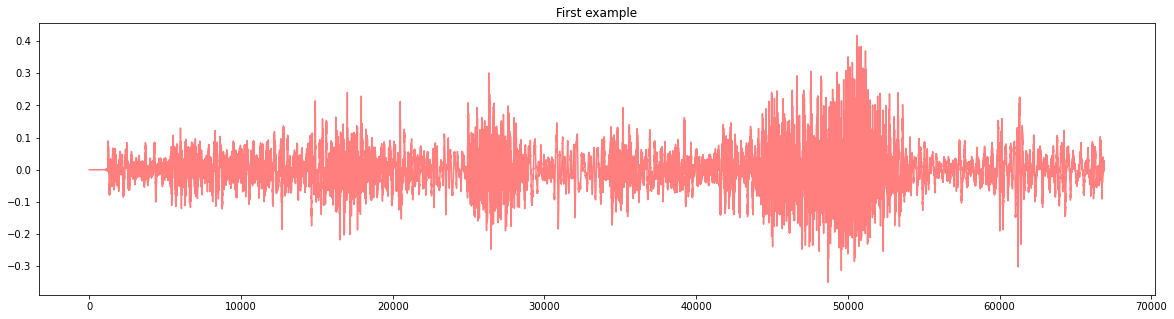

In [37]:

# A sound is just a one-dimensional array!
# Звук это всего лишь одномерный массив!

waveform.plot(figsize=(20, 5), alpha=0.5, color='red', title="First example");

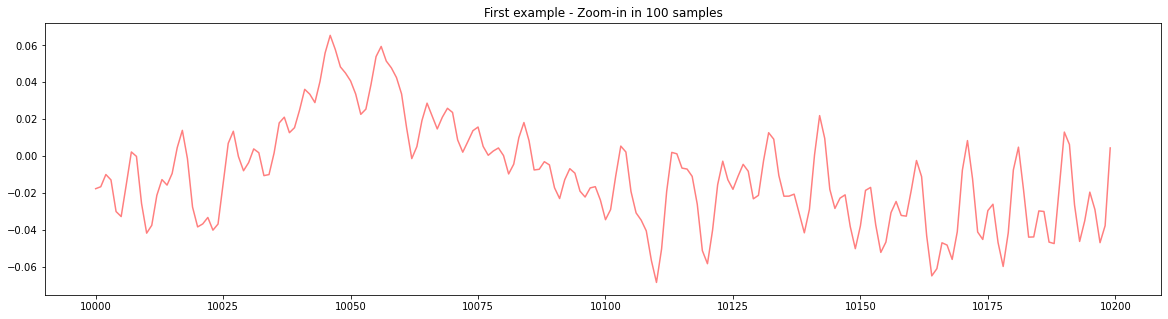

In [38]:

# It looks "dense" because it oscilates a big deal and it's very compresed, but it's just a simple line
# График выглядит "плотным" из-за сильного колебания и сжатия, но это всего лишь простая линия

waveform[10000:10200].plot(figsize=(20, 5), alpha=0.5, color='red', title="First example - Zoom-in in 100 samples");


In [39]:

# Since the sample rate is 32K, 400 samples is a sound that lasts 6.25 milliseconds
# Поскольку sample rate составляет 32 Кб, 400 сэмплов - это звук, который длится 6,25 миллисекунд

200 / sample_rate


0.00625

# Using torchaudio.info

In [40]:

# torchaudio.info(filepath: str)
# Получим список элементов, описывающих файл

info = torchaudio.info(a_file)
[attr for attr in dir(info) if not attr.startswith("_")]


['bits_per_sample', 'encoding', 'num_channels', 'num_frames', 'sample_rate']

In [41]:

# Getting a dictionary of file data
# Получаем словарь данных с информацией о файле

for attr in dir(info):
    if not attr.startswith("_"):
        print(f"{attr:<16}= {getattr(info, attr)}")
        

bits_per_sample = 0
encoding        = VORBIS
num_channels    = 2
num_frames      = 66873
sample_rate     = 32000


# Play the sound!

In [42]:

# IPython.display.Audio lets you play audio directly in an IPython notebook
# Класс IPython.display.Audio позволяет воспроизводить аудио непосредственно в ноутбуке IPython

from IPython.display import Audio


In [43]:

Audio(waveform, rate=sample_rate)


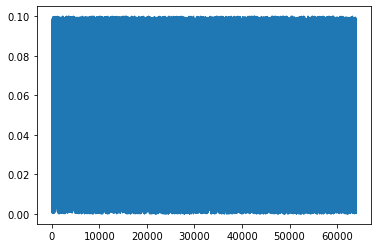

In [26]:

import numpy as np

# we will get a random sound. It looks like white noise
# Получим случайный звук. Это поохоже на белый шум

random_sound = np.random.rand(sample_rate * 2) / 10 # 2 seconds 
pd.Series(random_sound).plot();
Audio(random_sound, rate=sample_rate)


<AxesSubplot:>

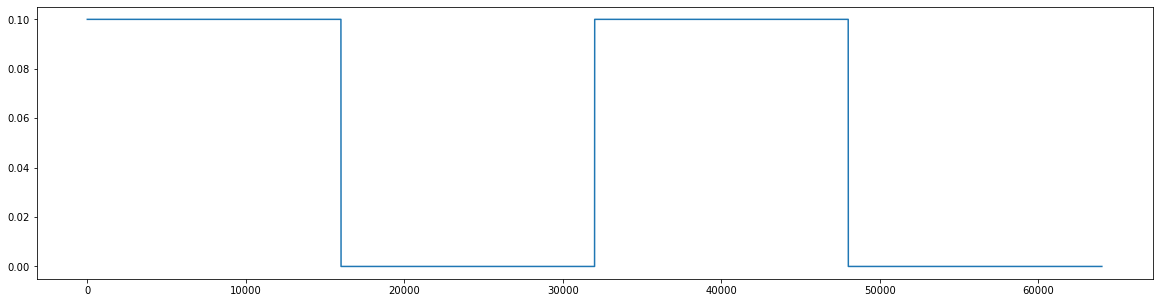

In [45]:

# let's create a musical bit
# Создадим музыкальный бит

square_sound = np.ones(sample_rate * 2) / 10
square_sound[16000:32000] = 0
square_sound[32000+16000:] = 0
display(pd.Series(square_sound).plot())
Audio(square_sound, rate=sample_rate)


In [31]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)


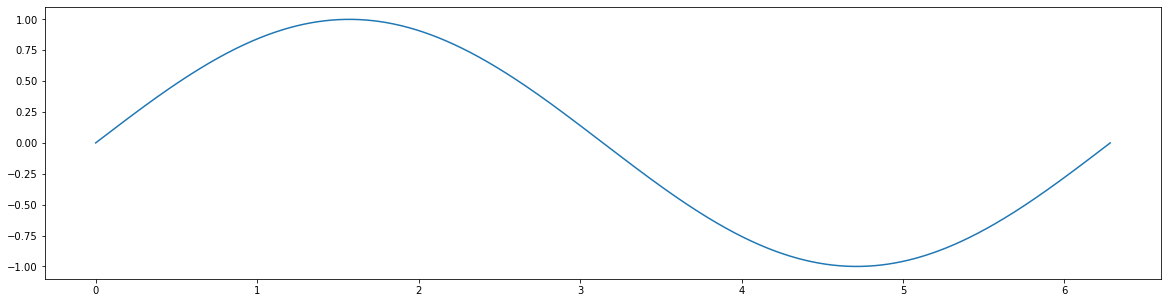

In [46]:

# One sin cycle happens between 0 and 2 pi
# Один sin цикл пролегает между 0 и 2 pi

x = np.linspace(0, 2*np.pi, 10000)
sin = np.sin(x)
plt.plot(x, sin);

# Cannot hear it.
# Это не возможно услышать.

Audio(sin, rate=sample_rate)


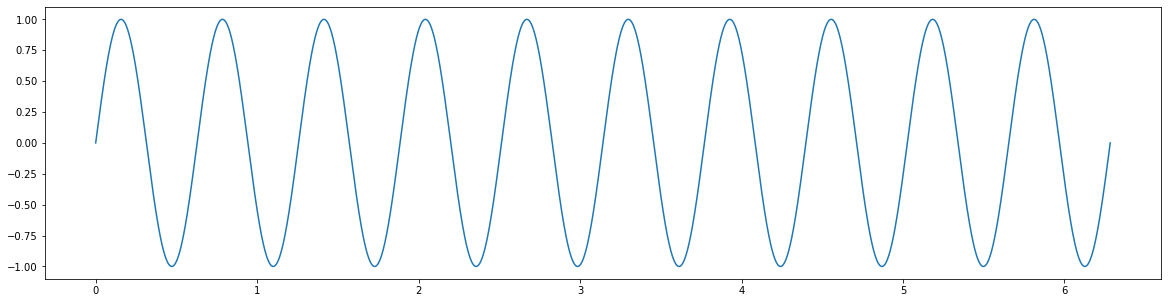

In [47]:

# Increase cycle frequency
# Увеличиваем частоту цикла.

x = np.linspace(0, 2*np.pi, sample_rate)
sin = np.sin(10*x)
plt.plot(x, sin);

# Still cannot hear it, but it's below the human perception frequency range
# Всё ещё невозможно услышать, но это за пределами человеческого восприятия

Audio(sin, rate=sample_rate)


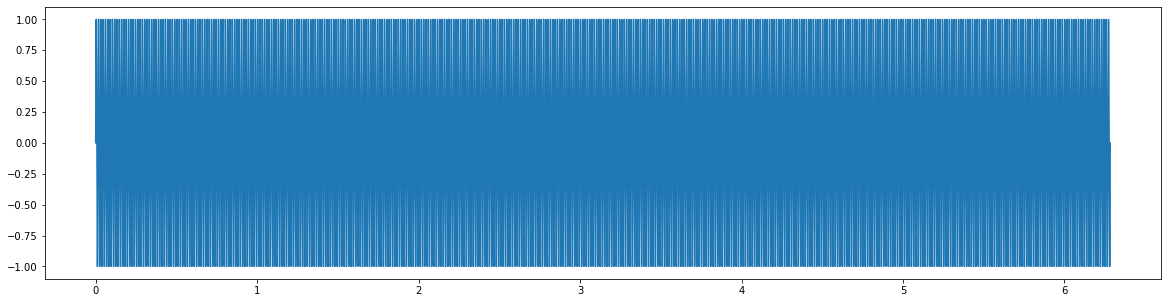

In [48]:

# Increase cycle frequency to 440 Hz, which is the musical note A
# Увеличьте частоту цикла до 440 Гц, которая является музыкальной нотой Ля

x = np.linspace(0, 2*np.pi, 32000)
sin = np.sin(440*x)
plt.plot(x, sin);
# Play it
Audio(sin, rate=sample_rate)


In [49]:

def get_note(frequency=440, volume=1, duration=2, sample_rate=32000, plot_wave=False, display_audio=False):
    x = np.linspace(0, 2*np.pi*duration, int(sample_rate*duration))
    sin = volume * np.sin(frequency * x)
    
    if plot_wave: 
        plt.plot(x, sin)
        plt.show()
    
    if display_audio:
        display(Audio(sin, rate=sample_rate))
    return sin


In [51]:

# This is an A
# Это нота Ля

get_note(frequency=440, display_audio=True);


In [53]:

# This is an E
# Это нота Ми

get_note(frequency=329.63, display_audio=True);


# Let's play a musical scale now

In [54]:

# Get a table with scales from a web page
# Получить сводную таблицы нот с веб-страницы

def get_scale_notes():
    df_notes = pd.read_html("https://pages.mtu.edu/~suits/notefreqs.html")[1]
    df_notes.columns = ['note', 'frequency', 'waveform']
    df_notes = df_notes[['note', 'frequency']]
    mask = (df_notes['note'].str.contains("4") & ~df_notes['note'].str.contains("#")) | (df_notes['note'] == 'C5')
    return df_notes[mask]

scale = get_scale_notes()
scale


,note,frequency
48,C4,261.63
50,D4,293.66
52,E4,329.63
53,F4,349.23
55,G4,392.00
57,A4,440.00
59,B4,493.88
60,C5,523.25


In [55]:

scale_sound = np.concatenate([get_note(frequency=frequency, duration=0.3) 
                              for frequency in scale['frequency'].tolist()])

# Up!
# Гамма вверх

Audio(scale_sound, rate=sample_rate)


In [56]:

# And down!
# Гамма вниз

Audio(scale_sound[::-1], rate=sample_rate)
